In [84]:
from sklearn.datasets import fetch_openml
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error

In [3]:
bike_sharing = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
df = bike_sharing.frame

In [4]:
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0000,16
1,spring,0,1,1,False,6,False,clear,9.02,13.635,0.80,0.0000,40
2,spring,0,1,2,False,6,False,clear,9.02,13.635,0.80,0.0000,32
3,spring,0,1,3,False,6,False,clear,9.84,14.395,0.75,0.0000,13
4,spring,0,1,4,False,6,False,clear,9.84,14.395,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,False,1,True,misty,10.66,12.880,0.60,11.0014,119
17375,spring,1,12,20,False,1,True,misty,10.66,12.880,0.60,11.0014,89
17376,spring,1,12,21,False,1,True,clear,10.66,12.880,0.60,11.0014,90
17377,spring,1,12,22,False,1,True,clear,10.66,13.635,0.56,8.9981,61


In [5]:
def column_convert_to_numeric(column):
    d = {}
    for i in range(len(np.unique(np.array(df[column])))):
        d[np.unique(np.array(df[column]))[i]]= i
    
    vals=[]
    for i in np.array(df[column]):
        vals.append(d[i])
    return np.array(vals)

In [6]:
for i in df.columns:
    if df[i].dtype.name == "category":
        df[i] = column_convert_to_numeric(i)

In [7]:
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,1,0,1,0,0,6,0,0,9.84,14.395,0.81,0.0000,16
1,1,0,1,1,0,6,0,0,9.02,13.635,0.80,0.0000,40
2,1,0,1,2,0,6,0,0,9.02,13.635,0.80,0.0000,32
3,1,0,1,3,0,6,0,0,9.84,14.395,0.75,0.0000,13
4,1,0,1,4,0,6,0,0,9.84,14.395,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,10.66,12.880,0.60,11.0014,119
17375,1,1,12,20,0,1,1,2,10.66,12.880,0.60,11.0014,89
17376,1,1,12,21,0,1,1,0,10.66,12.880,0.60,11.0014,90
17377,1,1,12,22,0,1,1,0,10.66,13.635,0.56,8.9981,61


In [8]:
def columns_Normalization(column):
    min = np.min(df[column])
    max = np.max(df[column])
    norm_val = []
    for i in range(len(df[column])):
        n= (df[column][i]-min)/(max-min)
        norm_val.append(n)
    return norm_val

In [9]:
for i in df.columns:
    df[i]=columns_Normalization(i)

In [10]:
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,0.333333,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.81,0.000000,0.015369
1,0.333333,0.0,0.0,0.043478,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.80,0.000000,0.039959
2,0.333333,0.0,0.0,0.086957,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.80,0.000000,0.031762
3,0.333333,0.0,0.0,0.130435,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.75,0.000000,0.012295
4,0.333333,0.0,0.0,0.173913,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.75,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.333333,1.0,1.0,0.826087,0.0,0.166667,1.0,0.666667,0.244898,0.2576,0.60,0.193018,0.120902
17375,0.333333,1.0,1.0,0.869565,0.0,0.166667,1.0,0.666667,0.244898,0.2576,0.60,0.193018,0.090164
17376,0.333333,1.0,1.0,0.913043,0.0,0.166667,1.0,0.000000,0.244898,0.2576,0.60,0.193018,0.091189
17377,0.333333,1.0,1.0,0.956522,0.0,0.166667,1.0,0.000000,0.244898,0.2727,0.56,0.157870,0.061475


In [11]:
y = df['count']

In [12]:
y.shape

(17379,)

In [13]:
X = df.loc[:,df.columns != 'count']

In [14]:
X.shape

(17379, 12)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)

In [17]:
X_test.shape

TensorShape([3476, 12])

In [18]:
X_train.shape

TensorShape([13903, 12])

In [19]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [20]:
X_train = X_train.reshape(13903,12,1) 
X_test = X_test.reshape(3476, 12,1)

In [21]:
input_layer = layers.Input(shape=(12,))

In [22]:
input_layer.shape

(None, 12)

In [23]:
dummy_train_tensor=X_train[:10]

In [24]:
dummy_train_tensor.shape

TensorShape([10, 12, 1])

In [25]:
x = layers.Conv1D(64,5, activation="relu")(dummy_train_tensor)

In [26]:
x.shape

TensorShape([10, 8, 64])

In [27]:
x = layers.Conv1D(32,6, activation="relu")(x)

In [28]:
x.shape

TensorShape([10, 3, 32])

In [29]:
x = layers.Conv1D(16,2, activation="relu",name='conv_layer_3')(x)

In [30]:
x.shape

TensorShape([10, 2, 16])

In [31]:
tf.random.set_seed(0)
input_layer = layers.Input(shape=(12,1))

x = layers.Conv1D(64,5, activation ="relu", name='conv_layer_1')(input_layer)
x = layers.Conv1D(32,6, activation="relu",name='conv_layer_2')(x)
x = layers.Conv1D(16,2, activation="relu",name='conv_layer_3')(x)

z =layers.Flatten()(x)

output_layer  = Dense(1, activation = 'relu', name ='output_layer')(z)

In [32]:
cnn = Model(inputs = input_layer, outputs = output_layer)

In [33]:
cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv1D)           │ (None, 8, 64)          │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv1D)           │ (None, 3, 32)          │        12,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_3 (Conv1D)           │ (None, 2, 16)          │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,777 (53.82 KB)

 Trainable params: 13,777 (53.82 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
cnn.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),loss='mse')

In [35]:
history_cnn = cnn.fit(X_train, y_train, batch_size =20, epochs=100)

Epoch 1/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0208
Epoch 2/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0124
Epoch 3/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0087
Epoch 4/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0061
Epoch 5/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0047
Epoch 6/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0040
Epoch 7/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0038
Epoch 8/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0036
Epoch 9/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0036
Epoch 10/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0032
Epoch 11/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0032
Epoch 12/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0029
Epoch 13/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0029
Epoch 14/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0029
Epoch 15/100
696/696 ━━━━━━━━━━━━━━━━━━━━ 1

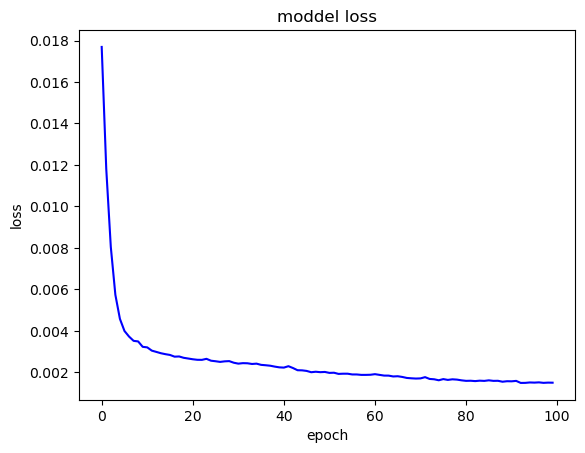

In [91]:
plt.plot(history_cnn.history['loss'],'b')
plt.title('moddel loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [73]:
ypred = cnn.predict(X_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [78]:
cnn.evaluate(X_train, y_train)

435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 0.0017


0.0017276536673307419

In [88]:
mean_squared_error(y_test, ypred)

0.002100025219059541

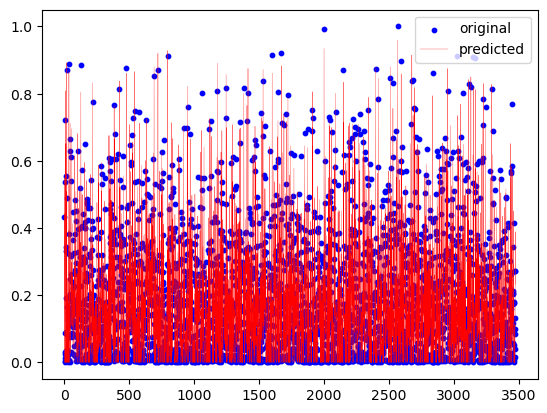

In [105]:
X_axis = range(len(ypred))
plt.scatter(X_axis, y_test, s=10, color="blue", label="original")
plt.plot(X_axis, ypred, lw=0.2, color="red", label="predicted")
plt.legend()
plt.show()

In [109]:
ypred

array([[0.44279608],
       [0.08622494],
       [0.        ],
       ...,
       [0.052712  ],
       [0.3889471 ],
       [0.23206949]], dtype=float32)

In [113]:
y_test

12830    0.434426
8688     0.089139
7091     0.003074
12230    0.537910
431      0.012295
           ...   
6759     0.016393
13989    0.086066
173      0.099385
16192    0.271516
8211     0.272541
Name: count, Length: 3476, dtype: float64